<a href="https://colab.research.google.com/github/ankit-rathi/Quantvesting_v2/blob/main/myStocks_Portfolio_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyxirr
!pip install yfinance==0.2.59
!pip install ta

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.1/533.1 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.66
    Uninstalling yfinance-0.2.66:
      Successfully uninstalled yfinance-0.2.66
  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=cb169ad3aa13a5a04df695a0abd668364b875b71d6513f9ef47bd2054b715c56
  Stored in directory: /root/.cache/pip/wheels/5c/a1/5f/c6b85a7d9452057be4ce68a8e45d77ba34234a6d46581777c6
Successfully built ta


In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
project_path = '/content/drive/My Drive/quantvesting'
os.chdir(project_path)

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table

Mounted at /content/drive


Run date time (IST): 2026-01-28 16:45:39
-------------------
qualified stocks: 86
with latest results: 25
still star stocks: 14
-------------------
Initial Investment:  1.30 C
CY Investment:  1.57 C
Reserve:  1.68 K
Current:  1.37 C
-------------------
Today PnL: 1.72 L (1.27%)
Current PnL: -32.39 L (-20.66%)
CY Booked + Current PnL: -18.10 L (-11.54%)
-------------------
Total profit:  1.56 L
Total loss:  -33.95 L
-------------------
Total Booked + Current PnL: 8.88 L (6.84%)
Total Booked PnL: 41.27 L (31.79%)
Curr Year Booked PnL: 14.29 L (10.45%)
Prev Year Booked PnL: 26.98 L (20.78%)
Est FTT:  2.34 C
Est FTT PnL: 97.73 L (71.5%)
Deployed:  1.30 C
Current:  1.37 C
CAGR/XIRR %: 2.71%
Row successfully appended and saved to data/myPortfolioDB.csv.


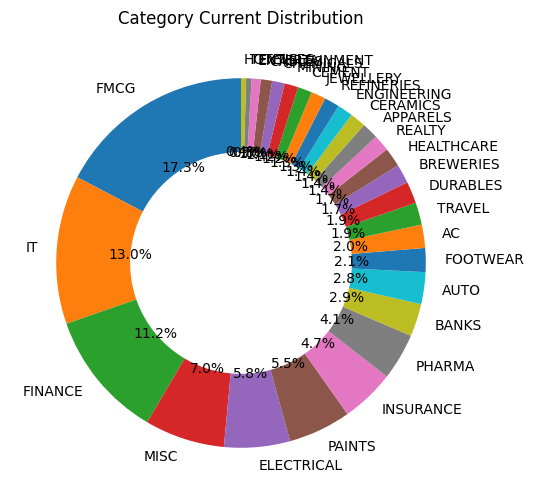

In [3]:
# Import the function from the script
import myStocks_Portfolio_Analysis_v2

eod = 1

# Call the function to get the DataFrame
df_portfolio_features = myStocks_Portfolio_Analysis_v2.get_portfolio_features_v2(eod)
cols = ['Symbol', 'FTT','Today P/L%', 'Current P/L%', 'FTT%', 'OTT%', 'FTT Amt', 'Current P/L', 'Current', 'Dev%_PE', 'RSI_14','Conviction', 'Spread%',  'CumlRnk', 'RRR Ind', 'CurrAlloc%', 'Gained%', 'Criteria', 'Strategy', 'Category']

tmp_df = df_portfolio_features
list_x40 = list(tmp_df[tmp_df['MBQ'].str.contains('X40', na=False)]['Symbol'].values)
list_x5k = list(tmp_df[tmp_df['MBQ'].str.contains('X5K', na=False)]['Symbol'].values)
list_x40n = list(tmp_df[tmp_df['MBQ'].str.contains('X40N', na=False)]['Symbol'].values)
list_hc = list(tmp_df[tmp_df['Conviction'].isin(['X-LC', 'H-LC', 'X-MC', 'X-SC'])]['Symbol'].values)
list_ox40 = list(tmp_df[tmp_df['MBQ'].str.contains('OX40', na=False)]['Symbol'].values)
list_ox40n = list(tmp_df[tmp_df['MBQ'].str.contains('OX40N', na=False)]['Symbol'].values)
#len(set(list_x40 + list_x5k) - set( list_x40n))
stock_list = list(set(list_x40 + list_x5k + list_hc)- set(list_ox40 + list_ox40n))

In [4]:
# all portfolio
tmp_df = df_portfolio_features[cols].sort_values(by = 'FTT Amt', ascending=True)
data_table.DataTable(tmp_df, include_index=False)

,Symbol,FTT,Today P/L%,Current P/L%,FTT%,OTT%,FTT Amt,Current P/L,Current,Dev%_PE,RSI_14,Conviction,Spread%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
17,COALINDIA,484.83,5.00,9.20,9.18,19.23,15083.0,13838.0,164298.0,28.65,68.0,L-LC,11.60,182.0,0.92,1.20,32.43,XY25,ATH,MINING
51,NESTLEIND,1377.00,-0.84,13.94,6.55,21.40,19809.0,36996.0,302422.0,5.69,50.0,X-LC,7.28,14.0,1.87,2.21,21.15,XY25,NTT,FMCG
77,TTKPRESTIG,770.00,2.21,-22.43,29.03,0.09,22694.0,-22603.0,78174.0,81.43,46.0,M-SC,5.95,253.0,-1.00,0.57,3.01,OX40N,NTT,DURABLES
49,MASFIN,398.61,0.89,-2.88,25.67,22.05,24428.0,-2820.0,95160.0,-16.44,53.0,H-SC,3.79,168.0,-0.12,0.70,38.32,XR,ATH,FINANCE
32,HCLTECH,1908.19,0.55,12.24,10.33,23.83,28051.0,29623.0,271547.0,17.00,68.0,X-LC,7.05,13.0,1.06,1.99,30.28,X40,ATH,IT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,ACC,3906.00,-0.21,-29.22,131.91,64.15,222176.0,-69521.0,168430.0,-58.50,40.0,X-SC,6.92,84.0,-0.31,1.23,0.91,XY24,BTT,CEMENT
7,AWL,485.00,1.06,-32.01,131.18,57.19,290889.0,-104379.0,221748.0,-67.84,23.0,X-MC,14.81,58.0,-0.36,1.62,1.06,XY24,NTT,FMCG
60,REPCOHOME,880.00,3.87,-12.89,117.90,89.82,294254.0,-36926.0,249579.0,-56.78,50.0,H-SC,2.93,161.0,-0.13,1.83,32.05,XY24,NTT,FINANCE
10,BANDHANBNK,400.00,2.91,-26.23,160.84,92.42,330509.0,-73070.0,205489.0,44.40,63.0,H-SC,10.41,169.0,-0.22,1.50,18.76,XY24,NTT,BANKS


In [5]:
# High quality (X40 + X40N + X5K + X-LC + H-LC + X-MC + X-SC) stocks
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Symbol'].isin(stock_list))]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,FTT,Today P/L%,Current P/L%,FTT%,OTT%,FTT Amt,Current P/L,Current,Dev%_PE,RSI_14,Conviction,Spread%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
2,ABBOTINDIA,35195.00,-0.27,-7.38,27.47,18.07,45507.0,-13195.0,165660.0,-20.64,41.0,X-MC,8.25,64.0,-0.29,1.21,9.77,X40,ATH,PHARMA
3,ACC,3906.00,-0.21,-29.22,131.91,64.15,222176.0,-69521.0,168430.0,-58.50,40.0,X-SC,6.92,84.0,-0.31,1.23,0.91,XY24,BTT,CEMENT
5,ASIANPAINT,3460.25,-4.23,-12.21,37.76,20.95,83464.0,-30730.0,221038.0,-13.14,27.0,X-LC,11.75,36.0,-0.37,1.62,19.08,X40,ATH,PAINTS
7,AWL,485.00,1.06,-32.01,131.18,57.19,290889.0,-104379.0,221748.0,-67.84,23.0,X-MC,14.81,58.0,-0.36,1.62,1.06,XY24,NTT,FMCG
8,BAJAJHFL,181.50,0.60,-23.63,103.57,55.47,192442.0,-57477.0,185809.0,-32.33,31.0,X-MC,16.97,63.0,-0.30,1.36,0.92,X40N,ATH,FINANCE
9,BAJAJHLDNG,14451.52,0.90,-4.29,35.01,29.22,63707.0,-8157.0,181968.0,-6.67,41.0,X-LC,13.32,29.0,-0.13,1.33,1.36,X40,ATH,FINANCE
11,BATAINDIA,2096.00,0.76,-44.90,145.36,35.20,103065.0,-57767.0,70903.0,-7.00,19.0,X-SC,19.37,93.0,-0.56,0.52,0.76,X40,NTT,FOOTWEAR
12,BERGEPAINT,680.00,-3.32,-14.69,42.01,21.14,81472.0,-33405.0,193934.0,-20.67,23.0,X-MC,5.60,75.0,-0.41,1.42,5.07,XY24,NTT,PAINTS
15,CAMS,950.00,1.68,-7.05,33.92,24.48,79407.0,-17754.0,234102.0,-82.21,44.0,X-SC,6.43,86.0,-0.22,1.71,14.46,X40N,NTT,MISC
17,COALINDIA,484.83,5.00,9.20,9.18,19.23,15083.0,13838.0,164298.0,28.65,68.0,L-LC,11.60,182.0,0.92,1.20,32.43,XY25,ATH,MINING


In [6]:
# OX40N stocks
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Symbol'].isin(list_ox40n))]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,FTT,Today P/L%,Current P/L%,FTT%,OTT%,FTT Amt,Current P/L,Current,Dev%_PE,RSI_14,Conviction,Spread%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
0,5PAISA,593.00,3.79,-32.50,67.25,12.90,99189.0,-71003.0,147493.0,117.55,51.0,H-SC,6.68,173.0,-0.72,1.08,22.64,OX40N,NTT,FINANCE
16,CERA,9475.00,2.48,-34.70,89.73,23.89,103066.0,-61041.0,114862.0,-36.99,40.0,H-SC,15.40,154.0,-0.59,0.84,2.48,OX40N,NTT,CERAMICS
25,FINCABLES,1641.55,2.05,-8.06,126.14,107.91,171226.0,-11901.0,135743.0,-25.01,41.0,M-SC,10.51,220.0,-0.07,0.99,2.05,OX40N,ATH,CABLES
39,INDIGOPNTS,1408.00,0.46,-24.72,32.87,0.02,43192.0,-43156.0,131403.0,100.33,33.0,M-SC,7.22,240.0,-1.00,0.96,14.30,OX40N,NTT,PAINTS
44,JCHAC,2282.00,-4.28,-43.56,77.17,-0.01,55661.0,-55677.0,72128.0,14660.87,28.0,M-SC,14.94,235.0,-1.00,0.53,0.00,OX40N,BTT,AC
47,KANSAINER,340.00,0.40,-24.51,50.32,13.47,102437.0,-66096.0,203571.0,-68.90,42.0,H-SC,5.01,159.0,-0.65,1.49,3.51,XY24,NTT,PAINTS
55,RAJESHEXPO,518.00,3.00,-67.99,212.63,0.07,93362.0,-93269.0,43908.0,1509.85,42.0,L-SC,10.42,269.0,-1.00,0.32,9.20,OX40N,NTT,JEWELLERY
63,SFL,1287.00,1.56,-48.26,144.75,26.63,196381.0,-126549.0,135669.0,2.78,35.0,M-SC,14.78,241.0,-0.64,0.99,1.60,XY24,NTT,MISC
66,SIS,528.00,0.69,-24.82,61.30,21.26,51170.0,-27558.0,83474.0,1968.39,48.0,H-SC,5.12,163.0,-0.54,0.61,12.78,OX40N,NTT,MISC
70,SYMPHONY,1306.00,1.45,-35.72,55.51,-0.03,61069.0,-61127.0,110014.0,-48.36,36.0,M-SC,13.20,206.0,-1.00,0.80,1.45,OX40N,NTT,DURABLES


In [7]:
# XSP allocation
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Criteria'].isin(['XY24','XY25']) ) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,FTT,Today P/L%,Current P/L%,FTT%,OTT%,FTT Amt,Current P/L,Current,Dev%_PE,RSI_14,Conviction,Spread%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
3,ACC,3906.00,-0.21,-29.22,131.91,64.15,222176.0,-69521.0,168430.0,-58.50,40.0,X-SC,6.92,84.0,-0.31,1.23,0.91,XY24,BTT,CEMENT
6,ATULAUTO,844.00,3.64,-30.53,109.53,45.57,150004.0,-60180.0,136952.0,2948.65,38.0,M-SC,7.55,245.0,-0.40,1.00,3.64,XY24,NTT,AUTO
7,AWL,485.00,1.06,-32.01,131.18,57.19,290889.0,-104379.0,221748.0,-67.84,23.0,X-MC,14.81,58.0,-0.36,1.62,1.06,XY24,NTT,FMCG
10,BANDHANBNK,400.00,2.91,-26.23,160.84,92.42,330509.0,-73070.0,205489.0,44.40,63.0,H-SC,10.41,169.0,-0.22,1.50,18.76,XY24,NTT,BANKS
12,BERGEPAINT,680.00,-3.32,-14.69,42.01,21.14,81472.0,-33405.0,193934.0,-20.67,23.0,X-MC,5.60,75.0,-0.41,1.42,5.07,XY24,NTT,PAINTS
14,CAMPUS,393.00,3.69,-14.18,55.31,33.28,79638.0,-23790.0,143985.0,-30.83,47.0,M-SC,5.46,221.0,-0.30,1.05,11.60,XY24,NTT,FOOTWEAR
17,COALINDIA,484.83,5.00,9.20,9.18,19.23,15083.0,13838.0,164298.0,28.65,68.0,L-LC,11.60,182.0,0.92,1.20,32.43,XY25,ATH,MINING
19,COLPAL,3726.84,0.02,-18.20,72.99,41.51,157250.0,-47925.0,215440.0,-2.56,56.0,X-MC,7.98,65.0,-0.30,1.58,5.27,XY25,ATH,FMCG
20,DABUR,735.00,0.46,0.83,42.51,43.70,106334.0,2071.0,250139.0,-7.41,53.0,X-MC,3.26,73.0,0.02,1.83,16.01,XY24,BTT,FMCG
24,EASEMYTRIP,26.40,2.41,-64.85,314.44,45.70,195450.0,-114657.0,62158.0,-35.57,26.0,M-SC,22.74,207.0,-0.59,0.45,2.41,XY24,NTT,TRAVEL


In [8]:
# XR/AR/SR allocation
tmp_df = df_portfolio_features[cols][df_portfolio_features['Criteria'].isin(['AR','XR','SR'])]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,FTT,Today P/L%,Current P/L%,FTT%,OTT%,FTT Amt,Current P/L,Current,Dev%_PE,RSI_14,Conviction,Spread%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
1,ABB,7934.00,7.14,-7.47,57.31,45.57,138741.0,-19531.0,242088.0,-40.52,54.0,H-MC,7.32,121.0,-0.14,1.77,7.50,AR,NTT,ELECTRICAL
4,ALKYLAMINE,4546.37,1.36,-32.64,187.44,93.63,127484.0,-32950.0,68013.0,-27.89,47.0,H-SC,16.49,143.0,-0.26,0.50,2.82,SR,ATH,CHEMICALS
13,BSOFT,831.70,0.97,-27.02,106.61,50.79,109435.0,-38003.0,102650.0,-6.46,43.0,H-SC,6.23,171.0,-0.35,0.75,19.52,XR,ATH,IT
18,COFFEEDAY,80.00,3.98,-46.96,155.02,35.27,93369.0,-53319.0,60230.0,-59.76,39.0,L-SC,8.78,268.0,-0.57,0.44,47.42,XR,NTT,HOTELS
21,DEN,75.00,3.09,-46.86,167.38,42.07,75120.0,-39584.0,44880.0,60.62,34.0,M-SC,11.26,236.0,-0.53,0.33,3.09,AR,NTT,ENTERTAINMENT
29,HAPPSTMNDS,1480.71,-0.23,-49.53,266.29,84.85,172236.0,-63485.0,64680.0,-39.93,23.0,H-SC,20.89,153.0,-0.37,0.47,0.00,AR,ATH,IT
30,HATHWAY,31.40,4.20,-41.17,194.56,73.29,124441.0,-44760.0,63960.0,642.75,31.0,H-SC,15.75,172.0,-0.36,0.47,4.31,XR,NTT,ENTERTAINMENT
37,IEX,219.00,0.91,-12.65,70.15,48.63,122523.0,-25295.0,174659.0,-41.93,39.0,H-SC,14.37,137.0,-0.21,1.28,0.93,XR,NTT,MISC
38,INDIAMART,4810.62,0.00,-6.05,120.03,106.72,139084.0,-7462.0,115874.0,-53.49,48.0,H-SC,8.88,138.0,-0.05,0.85,15.91,AR,ATH,MISC
40,INDUSINDBK,1800.00,0.78,-33.43,99.62,32.89,51202.0,-25810.0,51397.0,-734.87,53.0,L-MC,11.33,259.0,-0.50,0.38,41.54,XR,NTT,BANKS


In [9]:
# Top N allocation
df_tmp = df_portfolio_features[cols].sort_values(by = 'CurrAlloc%', ascending=False)
top_n_values = [10, 20, 30]

sum_df = pd.DataFrame({
    'Top_N': top_n_values,
    'Sum_Alloc%': [df_tmp['CurrAlloc%'].head(n).sum() for n in top_n_values]
})

sum_df

,Top_N,Sum_Alloc%
0,10,20.62
1,20,37.29
2,30,52.07


In [10]:
# market-cap-wise allocation
df_portfolio_features[cols].groupby(df_portfolio_features['Conviction'].str[-2:])['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
SC,42.62
MC,30.62
LC,26.72


In [11]:
# criteria-wise allocation
df_portfolio_features[cols].groupby('Criteria')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Criteria,
XY24,26.30
X40,23.99
X40N,12.65
XY25,11.08
XR,8.78
AR,8.77
OX40N,7.45
SR,0.94


In [12]:
# conviction-wise allocation
df_portfolio_features[cols].groupby('Conviction')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
X-MC,24.01
X-LC,23.22
H-SC,23.18
M-SC,10.92
X-SC,7.76
H-MC,4.71
M-MC,1.52
M-LC,1.21
L-LC,1.20


In [13]:
# criteria-conviction-wise allocation
df_portfolio_features[cols].groupby(['Criteria', 'Conviction'])['CurrAlloc%'].sum().sort_values(ascending=False)

Criteria  Conviction
X40       X-LC          11.36
          X-MC          10.38
XY24      H-SC           9.71
XR        H-SC           5.75
X40N      X-MC           5.67
XY25      X-LC           5.27
XY24      M-SC           5.11
          X-MC           4.87
OX40N     M-SC           3.85
X40N      X-LC           3.83
AR        H-SC           3.50
OX40N     H-SC           3.28
AR        H-MC           3.22
X40N      X-SC           3.15
XY25      X-MC           3.09
XY24      X-LC           2.76
          X-SC           2.36
X40       X-SC           2.25
XY25      M-MC           1.52
XY24      H-MC           1.49
XR        M-LC           1.21
XY25      L-LC           1.20
AR        H-LC           1.09
XR        M-SC           1.00
AR        M-SC           0.96
SR        H-SC           0.94
XR        L-SC           0.44
          L-MC           0.38
OX40N     L-SC           0.32
Name: CurrAlloc%, dtype: float64

In [14]:
# sector-wise stats
df_tmp = df_portfolio_features[cols].groupby('Category')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current P/L%', 'FTT%']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current P/L%,FTT%
Category,,,
FMCG,17.32,-11.22,47.71
IT,13.01,-20.24,80.31
FINANCE,11.21,-16.56,65.49
MISC,6.99,-35.88,91.46
ELECTRICAL,5.76,-19.16,62.63
PAINTS,5.49,-23.12,41.41
INSURANCE,4.69,-5.61,41.75
PHARMA,4.08,-5.21,38.33
BANKS,2.86,-36.72,119.57


In [15]:
# bucketX 1 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Conviction'].isin(['X-LC','H-LC','X-MC','X-SC'])) | (df_portfolio_features['Criteria'].isin(['XY24','XY25']))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,75.11,10269403.0,-18.05,-1853515.0,59.67,6128116.0


In [16]:
# bucketX 2 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Symbol'].isin(stock_list))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,60.39,8255421.0,-12.61,-1041168.0,47.99,3961724.0


In [17]:
# money to be made criteria-wise
df_portfolio_features.groupby('Criteria')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Criteria,
XY24,3373821.0
AR,1372290.0
XR,1293448.0
X40,1229623.0
X40N,1011835.0
OX40N,772258.0
XY25,428302.0
SR,291733.0


In [18]:
# money to be made conviction-wise
df_portfolio_features.groupby('Conviction')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Conviction,
H-SC,3626696.0
X-MC,1748503.0
M-SC,1563476.0
X-LC,1041290.0
X-SC,856492.0
H-MC,434683.0
L-SC,186731.0
M-LC,126935.0
H-LC,84535.0


In [19]:
# money to be made criteria and conviction-wise
df_portfolio_features.groupby(['Criteria','Conviction'])['FTT Amt'].sum().sort_values(ascending=False)

,,FTT Amt
Criteria,Conviction,
XY24,H-SC,1245099.0
AR,H-SC,933178.0
XY24,M-SC,889513.0
XR,H-SC,831632.0
X40,X-MC,593471.0
XY24,X-MC,478695.0
X40N,X-MC,446618.0
X40,X-LC,432935.0
OX40N,M-SC,353842.0


In [20]:
# conviction-wise stock count
df_portfolio_features['Conviction'].value_counts()

,count
Conviction,
H-SC,24
X-MC,16
M-SC,15
X-LC,13
X-SC,8
H-MC,3
L-SC,2
L-LC,1
L-MC,1
